In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [38]:
canton_df = gpd.read_file("/Users/connorhughes/Downloads/CHE_adm/CHE_adm1.shp")
canton_df.drop(["ID_0","ISO","NAME_0","ID_1","TYPE_1","ENGTYPE_1","NL_NAME_1","VARNAME_1"], axis=1, inplace=True)
canton_df.head()

,NAME_1,geometry
0,Aargau,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ..."
1,Appenzell Ausserrhoden,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ..."
2,Appenzell Innerrhoden,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3..."
3,Basel-Landschaft,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4..."
4,Basel-Stadt,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ..."


In [39]:
new_df = pd.read_excel("/Users/connorhughes/Downloads/kanton codes.xlsx")

canton_df = canton_df.merge(new_df, left_index=True, right_index=True)
#canton_df.drop(["Name_x"], axis=1, inplace=True)
canton_df.head()

,NAME_1,geometry,Name
0,Aargau,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",AG
1,Appenzell Ausserrhoden,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",AR
2,Appenzell Innerrhoden,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",AI
3,Basel-Landschaft,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",BL
4,Basel-Stadt,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",BS


In [40]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv")
covid_df.head()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN,NaN
1,2020-01-25,NaN,GE,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
2,2020-01-26,NaN,GE,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
3,2020-01-27,NaN,GE,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
4,2020-01-28,NaN,GE,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN


In [41]:
covid_df

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN,NaN
1,2020-01-25,NaN,GE,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
2,2020-01-26,NaN,GE,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
3,2020-01-27,NaN,GE,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
4,2020-01-28,NaN,GE,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,2020-09-11,16:00,UR,NaN,138.0,NaN,0.0,NaN,NaN,128.0,7.0,https://www.ur.ch/themen/2962,NaN,19.0,NaN,NaN
4675,2020-09-12,NaN,FL,NaN,111.0,NaN,0.0,NaN,NaN,105.0,1.0,https://www.llv.li/files/ag/aktuelle-fallzahle...,NaN,NaN,NaN,NaN
4676,2020-09-12,08:00,BE,NaN,2810.0,NaN,NaN,NaN,NaN,NaN,99.0,https://www.besondere-lage.sites.be.ch/besonde...,NaN,NaN,NaN,NaN
4677,2020-09-12,09:00,BS,NaN,1265.0,NaN,NaN,NaN,NaN,1165.0,54.0,https://www.gesundheit.bs.ch,46.0,94.0,NaN,NaN


In [42]:
covid_df.drop(columns=["time", "ncumul_tested", "new_hosp", "current_hosp", "current_icu", "current_vent", "ncumul_released", "source", "current_isolated", "current_quarantined"], axis=1, inplace=True)
covid_df["date"] = covid_df["date"].apply(lambda x: pd.to_datetime(x))
covid_df.head()

,date,abbreviation_canton_and_fl,ncumul_conf,ncumul_deceased,current_quarantined_riskareatravel,current_quarantined_total
0,2020-01-24,GE,NaN,NaN,NaN,NaN
1,2020-01-25,GE,NaN,NaN,NaN,NaN
2,2020-01-26,GE,NaN,NaN,NaN,NaN
3,2020-01-27,GE,NaN,NaN,NaN,NaN
4,2020-01-28,GE,NaN,NaN,NaN,NaN


In [43]:
covid_df = covid_df[covid_df["abbreviation_canton_and_fl"] != "FL"]
covid_df.reset_index(drop=True, inplace=True)
covid_df.head()

,date,abbreviation_canton_and_fl,ncumul_conf,ncumul_deceased,current_quarantined_riskareatravel,current_quarantined_total
0,2020-01-24,GE,NaN,NaN,NaN,NaN
1,2020-01-25,GE,NaN,NaN,NaN,NaN
2,2020-01-26,GE,NaN,NaN,NaN,NaN
3,2020-01-27,GE,NaN,NaN,NaN,NaN
4,2020-01-28,GE,NaN,NaN,NaN,NaN


In [44]:
#Make a master df with every date and every canton

#Use full rnage of covid data for dates
dates = pd.date_range(covid_df["date"].iloc[0].date(), covid_df["date"].iloc[-1].date(), freq='d')
cantons = new_df["Name"]

list_of_dates = []
list_of_cantons = []

for canton in cantons:
    for date in dates:
        list_of_cantons.append(canton)
        list_of_dates.append(date.date())

covid_df_clean = pd.DataFrame({"Date": list_of_dates, "Canton": list_of_cantons})
covid_df_clean["Cumulative Cases"] = np.nan * len(covid_df_clean)

covid_df_clean

,Date,Canton,Cumulative Cases
0,2020-01-24,AG,NaN
1,2020-01-25,AG,NaN
2,2020-01-26,AG,NaN
3,2020-01-27,AG,NaN
4,2020-01-28,AG,NaN
...,...,...,...
6053,2020-09-08,ZG,NaN
6054,2020-09-09,ZG,NaN
6055,2020-09-10,ZG,NaN
6056,2020-09-11,ZG,NaN


In [45]:
for i in range(len(covid_df)):
    
    if (int(i % (len(covid_df)/10)) == 0):
        display(str(int((100 * i)/len(covid_df))) + "% done")
    
    current_date = covid_df.iloc[i]["date"].date()
    current_canton = covid_df.iloc[i]["abbreviation_canton_and_fl"]
    
    #display(current_date)
    #display(current_canton)
    
    key_names = ["Date", "Canton"]
    keys = [current_date, current_canton]
    
    
    clean_index = int(np.where(covid_df_clean[key_names].isin(keys).all(1))[0][0])
    #display(clean_index)
    
    covid_df_clean["Cumulative Cases"].iloc[clean_index] = covid_df.iloc[i]["ncumul_conf"]
    
covid_df_clean

'0% done'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'10% done'

'20% done'

'30% done'

'40% done'

'50% done'

'60% done'

'70% done'

'80% done'

'90% done'

,Date,Canton,Cumulative Cases
0,2020-01-24,AG,NaN
1,2020-01-25,AG,NaN
2,2020-01-26,AG,NaN
3,2020-01-27,AG,NaN
4,2020-01-28,AG,NaN
...,...,...,...
6053,2020-09-08,ZG,384.0
6054,2020-09-09,ZG,386.0
6055,2020-09-10,ZG,388.0
6056,2020-09-11,ZG,392.0


In [46]:
for i in range(len(covid_df_clean["Cumulative Cases"])):
    #check if value is missing
    if pd.isnull(covid_df_clean["Cumulative Cases"].iloc[i]):
        #If its at the begining of a canton's data make it 0
        if ((i == 0) or (covid_df_clean["Canton"].iloc[i] != covid_df_clean["Canton"].iloc[i-1])):
            covid_df_clean["Cumulative Cases"].iloc[i] = 0
        else:
            #if its not at the begining make it equal to the last one
            covid_df_clean["Cumulative Cases"].iloc[i] = covid_df_clean["Cumulative Cases"].iloc[i-1]


display(covid_df_clean)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Date,Canton,Cumulative Cases
0,2020-01-24,AG,0.0
1,2020-01-25,AG,0.0
2,2020-01-26,AG,0.0
3,2020-01-27,AG,0.0
4,2020-01-28,AG,0.0
...,...,...,...
6053,2020-09-08,ZG,384.0
6054,2020-09-09,ZG,386.0
6055,2020-09-10,ZG,388.0
6056,2020-09-11,ZG,392.0


In [47]:
#Check current total across switzerland
#Also find max cases for any one canton to help with plotting later

my_sum = 0
max_cases = 0

for canton, cum_cases_list in covid_df_clean.groupby("Canton")["Cumulative Cases"]:
    #display(canton)
    #display(cum_cases_list.iloc[-1])
    my_sum += cum_cases_list.iloc[-1]
    
    if (cum_cases_list.iloc[-1] > max_cases):
        max_cases = cum_cases_list.iloc[-1]
    
display("Total: " + str(my_sum))
display(max_cases)

'Total: 45965.0'

8101.0

In [48]:
#Define a function to get cumulative cases geopandas df for a particlar date
def get_cases_on(a_date):
    days_cases = covid_df_clean[covid_df_clean["Date"] == a_date].set_index("Canton")["Cumulative Cases"]
    return canton_df.merge(days_cases, left_on = "Name", right_index=True)

,NAME_1,geometry,Name,Cumulative Cases
0,Aargau,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",AG,822.0
1,Appenzell Ausserrhoden,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",AR,74.0
2,Appenzell Innerrhoden,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",AI,24.0
3,Basel-Landschaft,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",BL,711.0
4,Basel-Stadt,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",BS,841.0


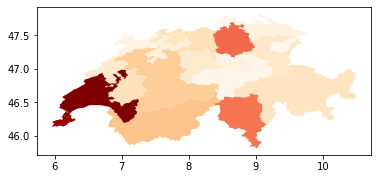

In [49]:
test = get_cases_on(pd.to_datetime("9/04/20", dayfirst=True))
display(test.head())
test.plot(column="Cumulative Cases", cmap="OrRd")

In [50]:
def get_plot_by_date(a_date_str):
    data = get_cases_on(pd.to_datetime(a_date_str, dayfirst=True))
    
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    
    #Deal with legend
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    data.plot(ax=ax, cax=cax, column="Cumulative Cases", edgecolor="black", cmap="OrRd", vmin=0, vmax=max_cases, legend=True)
    ax.set_title(a_date_str, fontsize=22)

    #Optional code to save figs without displaying
    pathname = "/Users/connorhughes/Desktop/CH Corona/" + a_date_str
    
    plt.savefig(pathname)
    plt.close()

In [51]:
get_plot_by_date("10-06-20")

In [52]:
def get_plots_by_date_range(start_date_str, end_date_str):

    start_date_formatted = pd.to_datetime(start_date_str, dayfirst=True).date()
    end_date_formatted = pd.to_datetime(end_date_str, dayfirst=True).date()
    
    for date in [d.strftime('%d-%m-%y') for d in pd.date_range(start_date_formatted,end_date_formatted)]:
        get_plot_by_date(date)

In [29]:
get_plots_by_date_range("24/01/20", "10/09/20")

In [53]:
#Make a master df with every date and every canton AGAIN

#Use full rnage of covid data for dates
dates = pd.date_range(covid_df["date"].iloc[0].date(), covid_df["date"].iloc[-1].date(), freq='d')
cantons = new_df["Name"]

list_of_dates = []
list_of_cantons = []

for canton in cantons:
    for date in dates:
        list_of_cantons.append(canton)
        list_of_dates.append(date.date())

covid_df_per_day = pd.DataFrame({"Date": list_of_dates, "Canton": list_of_cantons})
covid_df_per_day["Cases on that day"] = np.nan * len(covid_df_clean)

covid_df_per_day

,Date,Canton,Cases on that day
0,2020-01-24,AG,NaN
1,2020-01-25,AG,NaN
2,2020-01-26,AG,NaN
3,2020-01-27,AG,NaN
4,2020-01-28,AG,NaN
...,...,...,...
6053,2020-09-08,ZG,NaN
6054,2020-09-09,ZG,NaN
6055,2020-09-10,ZG,NaN
6056,2020-09-11,ZG,NaN


In [59]:
#Use already made cumulative df to calculate cases per day

to_append = [0]

for i in range(1, len(covid_df_clean)):
    to_append.append(covid_df_clean["Cumulative Cases"].iloc[i] - covid_df_clean["Cumulative Cases"].iloc[i-1])

covid_df_per_day["Cases on that day"] = to_append
covid_df_per_day

,Date,Canton,Cases on that day
0,2020-01-24,AG,0.0
1,2020-01-25,AG,0.0
2,2020-01-26,AG,0.0
3,2020-01-27,AG,0.0
4,2020-01-28,AG,0.0
...,...,...,...
6053,2020-09-08,ZG,7.0
6054,2020-09-09,ZG,2.0
6055,2020-09-10,ZG,2.0
6056,2020-09-11,ZG,4.0


In [ ]:
#Repeat all the code for making gif again

In [69]:
#Find max cases for any one canton to help with plotting later

max_daily_cases = covid_df_per_day["Cases on that day"].max()


display(max_daily_cases)

306.0

In [60]:
#Define a function to get daily cases geopandas df for a particlar date
def get_daily_cases_on(a_date):
    days_cases = covid_df_per_day[covid_df_per_day["Date"] == a_date].set_index("Canton")["Cases on that day"]
    return canton_df.merge(days_cases, left_on = "Name", right_index=True)

,NAME_1,geometry,Name,Cases on that day
0,Aargau,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",AG,34.0
1,Appenzell Ausserrhoden,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",AR,2.0
2,Appenzell Innerrhoden,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",AI,1.0
3,Basel-Landschaft,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",BL,17.0
4,Basel-Stadt,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",BS,12.0


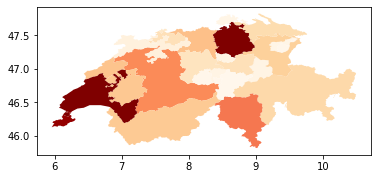

In [61]:
test = get_daily_cases_on(pd.to_datetime("9/04/20", dayfirst=True))
display(test.head())
test.plot(column="Cases on that day", cmap="OrRd")

In [70]:
def get_daily_plot_by_date(a_date_str):
    data = get_daily_cases_on(pd.to_datetime(a_date_str, dayfirst=True))
    
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    
    #Deal with legend
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    data.plot(ax=ax, cax=cax, column="Cases on that day", edgecolor="black", cmap="OrRd", vmin=0, vmax=max_daily_cases, legend=True)
    ax.set_title(a_date_str, fontsize=22)

    #Optional code to save figs without displaying
    pathname = "/Users/connorhughes/Desktop/CH Corona Daily/" + a_date_str
    
    plt.savefig(pathname)
    plt.close()

In [71]:
get_daily_plot_by_date("10-06-20")

In [72]:
def get_daily_plots_by_date_range(start_date_str, end_date_str):

    start_date_formatted = pd.to_datetime(start_date_str, dayfirst=True).date()
    end_date_formatted = pd.to_datetime(end_date_str, dayfirst=True).date()
    
    for date in [d.strftime('%d-%m-%y') for d in pd.date_range(start_date_formatted,end_date_formatted)]:
        get_daily_plot_by_date(date)

In [73]:
get_daily_plots_by_date_range("24/01/20", "10/09/20")